In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product



In [2]:
plt.rc('figure', autolayout=True)
plt.rc('image',cmap="magma")

In [3]:
kernel = tf.constant([[-1,-1,-1],
                      [-1,8,-1],
                      [-1,-1,-1]])

In [4]:
image = tf.io.read_file('Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image,size=[300,300])

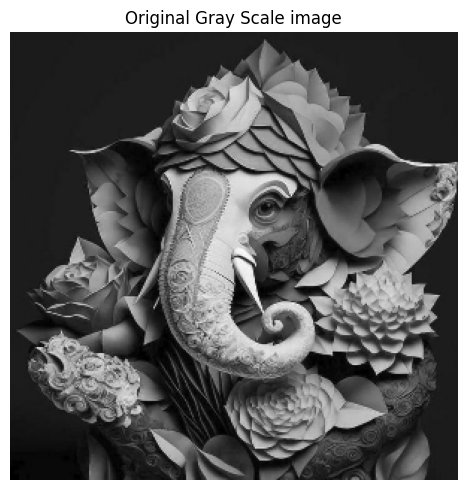

In [5]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

In [7]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1,1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [11]:
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'convolution')

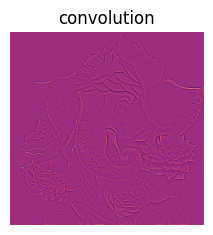

In [ ]:
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('convolution')


Text(0.5, 1.0, 'Activation')

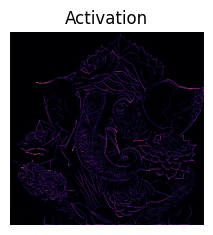

In [20]:
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

In [22]:
pool = tf.nn.pool
image_condense = pool(input=image_detect, 
                      window_shape=(2,2),
                      pooling_type='MAX',
                      strides=(2,2),
                      padding='SAME')

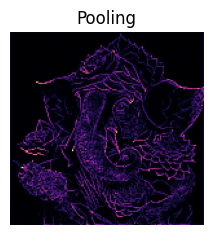

In [23]:
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()